# Healthcare Hospital

- ## Import all required libraries

In [231]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

- ### Load the dataset correctly

In [232]:
data = pd.read_csv("Healthcare_Hospital_Operations_Gigantic_Dataset.csv.csv")

- ### **Task 1: Notebook Structure & Data Loading**

- Display:
    - Dataset shape

In [233]:
print("Shape shows the number of rows and columns of the dataset")
data.shape

Shape shows the number of rows and columns of the dataset


(68000, 10)

- First & last 5 rows

In [234]:
print("Shows only top 5 records")
data.head()

Shows only top 5 records


,Patient_ID,Admission_Date,Hospital_Region,City,Department,Patient_Type,Length_of_Stay_Days,Treatment_Cost,Insurance_Type,Discharge_Status
0,800000,2022-01-21,Central,Mumbai,General,Inpatient,12.0,30716.80,Private,Recovered
1,800001,2023-01-27,South,Mumbai,General,Inpatient,1.0,197617.22,Self-Pay,Referred
2,800002,2023-12-30,NaN,Chennai,Neurology,Inpatient,8.0,403505.37,Private,Recovered
3,800003,2023-08-02,NaN,Chennai,Neurology,Outpatient,22.0,19975.17,Private,Recovered
4,800004,2023-10-21,South,NaN,Pediatrics,NaN,NaN,434580.60,Government,NaN


In [235]:
print("Shows only bottom 5 records")
data.tail()

Shows only bottom 5 records


,Patient_ID,Admission_Date,Hospital_Region,City,Department,Patient_Type,Length_of_Stay_Days,Treatment_Cost,Insurance_Type,Discharge_Status
67995,821041,2024-05-31,Central,Pune,Oncology,Inpatient,21.0,463084.12,Self-Pay,Recovered
67996,844371,2023-11-07,NaN,Delhi,NaN,NaN,14.0,347293.28,Self-Pay,Critical
67997,835040,2023-10-30,NaN,NaN,Cardiology,Inpatient,6.0,367992.20,Self-Pay,Referred
67998,855047,2024-03-02,East,Chennai,Neurology,Inpatient,27.0,20610.72,Self-Pay,Recovered
67999,815102,2022-10-11,Central,Mumbai,NaN,Outpatient,17.0,73405.17,Self-Pay,Recovered


- ### **Task 2: Data Cleaning & EDA**

- Identify and handle missing values

In [236]:
print("Tells about if our dataset is contains any null values or not")
data.isna().sum()

Tells about if our dataset is contains any null values or not


Patient_ID                 0
Admission_Date             0
Hospital_Region        17082
City                    7519
Department              6862
Patient_Type            6805
Length_of_Stay_Days     2271
Treatment_Cost             0
Insurance_Type          6692
Discharge_Status        6725
dtype: int64

In [237]:
print("Handled numerical missing values by filling with mean value of that column")
numeric_cols = data[["Length_of_Stay_Days"]].mean()
data.fillna(numeric_cols, inplace= True)

Handled numerical missing values by filling with mean value of that column


In [238]:
print("")
data.fillna(method ='ffill', inplace = True)

C:\Users\dhruv\AppData\Local\Temp\ipykernel_15660\3996276396.py:2: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data.fillna(method ='ffill', inplace = True)


In [239]:
data.isna().sum()

Patient_ID             0
Admission_Date         0
Hospital_Region        0
City                   0
Department             0
Patient_Type           0
Length_of_Stay_Days    0
Treatment_Cost         0
Insurance_Type         0
Discharge_Status       0
dtype: int64

- Validate data types

In [240]:
data.dtypes

Patient_ID               int64
Admission_Date          object
Hospital_Region         object
City                    object
Department              object
Patient_Type            object
Length_of_Stay_Days    float64
Treatment_Cost         float64
Insurance_Type          object
Discharge_Status        object
dtype: object

- Detect and handle duplicate records

In [241]:
print("Dropped all the duplicates of the dataset")
# Detect
data.duplicated()

# Handle
data.drop_duplicates(inplace= True)

Dropped all the duplicates of the dataset


- Generate:
    - Summary statistics

In [242]:
# Summary
print("Summary of the dataset")
data.info()

Summary of the dataset
<class 'pandas.core.frame.DataFrame'>
Index: 66344 entries, 0 to 67999
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Patient_ID           66344 non-null  int64  
 1   Admission_Date       66344 non-null  object 
 2   Hospital_Region      66344 non-null  object 
 3   City                 66344 non-null  object 
 4   Department           66344 non-null  object 
 5   Patient_Type         66344 non-null  object 
 6   Length_of_Stay_Days  66344 non-null  float64
 7   Treatment_Cost       66344 non-null  float64
 8   Insurance_Type       66344 non-null  object 
 9   Discharge_Status     66344 non-null  object 
dtypes: float64(2), int64(1), object(7)
memory usage: 5.6+ MB


- Department-wise and region-wise distributions

In [243]:
print("Groupby of the columns")
data["Department"].groupby(data["Hospital_Region"]).value_counts()

Groupby of the columns


Hospital_Region  Department 
Central          Neurology      2276
                 Pediatrics     2240
                 Oncology       2215
                 Cardiology     2211
                 General        2177
                 Orthopedics    2165
East             Orthopedics    2326
                 Pediatrics     2192
                 General        2144
                 Oncology       2139
                 Neurology      2131
                 Cardiology     2120
North            Pediatrics     2253
                 Cardiology     2228
                 Orthopedics    2220
                 General        2217
                 Neurology      2157
                 Oncology       2155
South            Pediatrics     2291
                 Cardiology     2285
                 General        2257
                 Neurology      2197
                 Oncology       2184
                 Orthopedics    2165
West             Cardiology     2268
                 Pediatrics     2251
         

In [244]:
print("Coverting Addmission_Date into months and years")
data["Admission_Date"] = pd.to_datetime(data["Admission_Date"])
data["Admission_months"] = data["Admission_Date"].dt.month
data["Admission_years"] = data["Admission_Date"].dt.year
data.drop("Admission_Date", axis = 1)

Coverting Addmission_Date into months and years


,Patient_ID,Hospital_Region,City,Department,Patient_Type,Length_of_Stay_Days,Treatment_Cost,Insurance_Type,Discharge_Status,Admission_months,Admission_years
0,800000,Central,Mumbai,General,Inpatient,12.000000,30716.80,Private,Recovered,1,2022
1,800001,South,Mumbai,General,Inpatient,1.000000,197617.22,Self-Pay,Referred,1,2023
2,800002,South,Chennai,Neurology,Inpatient,8.000000,403505.37,Private,Recovered,12,2023
3,800003,South,Chennai,Neurology,Outpatient,22.000000,19975.17,Private,Recovered,8,2023
4,800004,South,Chennai,Pediatrics,Outpatient,15.007911,434580.60,Government,Recovered,10,2023
...,...,...,...,...,...,...,...,...,...,...,...
67989,864602,West,Pune,Neurology,Inpatient,8.000000,306123.31,Private,Critical,9,2022
67991,804157,West,Mumbai,Neurology,Inpatient,25.000000,428729.83,Private,Critical,4,2024
67996,844371,Central,Delhi,Oncology,Inpatient,14.000000,347293.28,Self-Pay,Critical,11,2023
67997,835040,Central,Delhi,Cardiology,Inpatient,6.000000,367992.20,Self-Pay,Referred,10,2023


- ### **Task 3: Healthcare / Operational Data Analysis**

- Department-wise patient volume

In [245]:
data["Department"].groupby(data["Patient_Type"]).value_counts()

Patient_Type  Department 
Inpatient     Pediatrics     5595
              Orthopedics    5566
              Cardiology     5559
              General        5540
              Neurology      5525
              Oncology       5437
Outpatient    Pediatrics     5632
              Cardiology     5553
              Oncology       5506
              General        5496
              Orthopedics    5477
              Neurology      5458
Name: count, dtype: int64

- Average treatment cost per department

In [254]:
# Average treatment cost per department
avg_treatment_cost = data.groupby("Department")["Treatment_Cost"].mean()

- Region-wise hospital load

In [247]:
data["Discharge_Status"].groupby(data["Hospital_Region"]).value_counts()

Hospital_Region  Discharge_Status
Central          Recovered           6550
                 Referred            3704
                 Critical            3030
East             Recovered           6606
                 Referred            3631
                 Critical            2815
North            Recovered           6631
                 Referred            3669
                 Critical            2930
South            Recovered           6737
                 Referred            3732
                 Critical            2910
West             Recovered           6768
                 Referred            3742
                 Critical            2889
Name: count, dtype: int64

- Patient type vs length of stay

In [248]:
data["Hospital_Region"].groupby(data["Length_of_Stay_Days"]).value_counts()

Length_of_Stay_Days  Hospital_Region
1.0                  East               455
                     North              451
                     South              450
                     Central            437
                     West               384
                                       ... 
29.0                 Central            482
                     South              466
                     East               419
                     West               417
                     North              415
Name: count, Length: 150, dtype: int64

- Insurance type vs treatment cost analysis

In [249]:
data["Treatment_Cost"].groupby(data["Insurance_Type"]).value_counts()

Insurance_Type  Treatment_Cost
Government      1937.86           2
                3058.27           2
                3287.06           2
                4307.32           2
                5302.01           2
                                 ..
Self-Pay        499765.54         1
                499852.17         1
                499875.95         1
                499887.00         1
                499970.77         1
Name: count, Length: 65180, dtype: int64

- ### **Task 4: Data Visualization**

Create minimum 5 meaningful visualizations, such as:

1. Bar chart (Department vs Patient Count)

Text(0, 0.5, 'Patient Count')

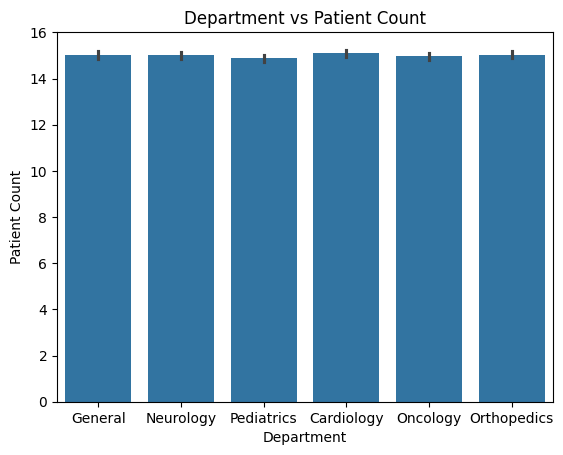

In [ ]:
sns.barplot(x = data["Department"], y = data["Length_of_Stay_Days"])
plt.title("Department vs Patient Count")
plt.xlabel("Department")
plt.ylabel("Patient Count")

2. Line chart (Admissions trend over time)

Text(0, 0.5, 'Number of Admissions')

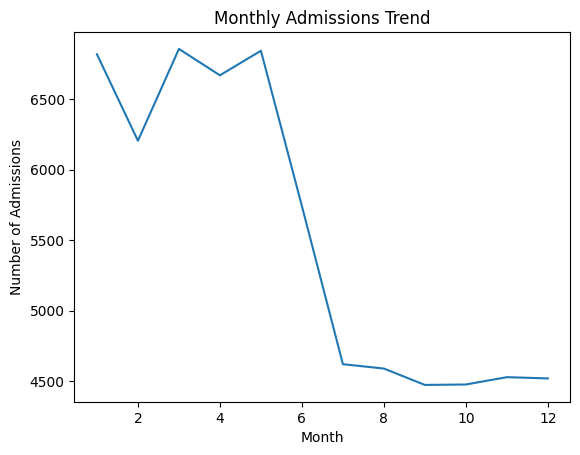

In [270]:
# Line chart (Admissions trend over time)
admissions_trend = data.groupby("Admission_months").size()
plt.plot(admissions_trend.index, admissions_trend.values)
plt.title("Monthly Admissions Trend")
plt.xlabel("Month")
plt.ylabel("Number of Admissions")

3. Histogram (Treatment cost distribution)

4. Pie Plot

5. Scatter Plot


- Each chart must include:
    - Title
    - Axis labels
    - Insight explanation

Text(0, 0.5, 'Treatment Cost')

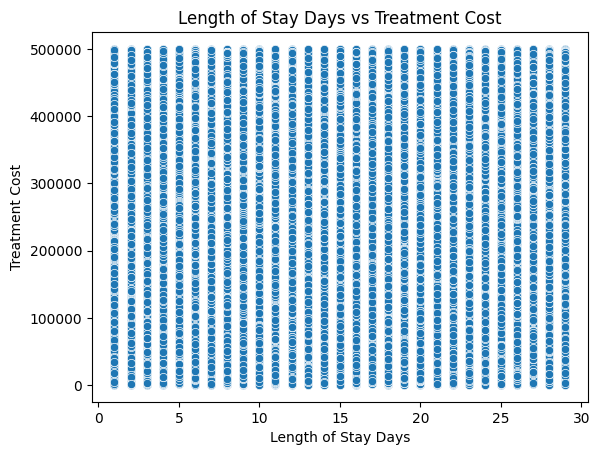

In [269]:
sns.scatterplot(x = data["Length_of_Stay_Days"], y = data["Treatment_Cost"])
plt.title("Length of Stay Days vs Treatment Cost")
plt.xlabel("Length of Stay Days")
plt.ylabel("Treatment Cost")

- ### **Task 5: Final Insights & Task Completion**

- Summarize key findings

- Mention healthcare insights

- Provide hospital improvement recommendations